In [1]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy import stats
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('ESSData_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 839.3+ KB


<Figure size 7200x7200 with 0 Axes>

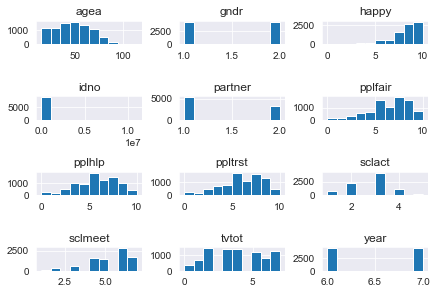

In [4]:
plt.figure(figsize=(100,100))
df.hist(sharey=False,sharex=False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [5]:
country_list = list(df['cntry'].unique())
print(country_list)

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']


In [6]:
def real_year(value):
    if value == 7:
        return 2014
    elif value == 6:
        return 2012
     
df['year'] = df['year'].apply(real_year)

In [7]:
# a dataframe for each country
Switzerland = df[df['cntry'] == 'CH']
Czech= df[df['cntry'] == 'CZ']
Spain= df[df['cntry'] == 'ES']
Norway= df[df['cntry'] == 'NO']
Sweden= df[df['cntry'] == 'SE']
Germany= df[df['cntry'] == 'DE']

In [8]:
Germany.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
2862,DE,11000031.0,2012,2.0,3.0,8.0,8.0,8.0,4.0,3.0,2.0,51.0,1.0
2863,DE,11000041.0,2012,7.0,7.0,7.0,6.0,8.0,5.0,3.0,1.0,75.0,1.0
2864,DE,11000071.0,2012,4.0,5.0,6.0,5.0,6.0,4.0,2.0,1.0,50.0,2.0
2865,DE,11000091.0,2012,7.0,8.0,6.0,5.0,7.0,5.0,2.0,1.0,71.0,1.0
2866,DE,11000131.0,2012,5.0,7.0,NaN,NaN,9.0,6.0,2.0,1.0,27.0,1.0


### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample

#### t-test for paired samples

In [9]:
countries=[Switzerland,Czech,Spain,Norway,Sweden,Germany]
countries_name= ['Switzerland','Czech','Spain','Norway','Sweden','Germany']

In [10]:
from scipy import stats

In [11]:
def pair_trust(country_name, df):
    sns.boxplot(y="ppltrst", x="year", data=df)
    plt.title('Trust for '+ country_name)
    plt.show()
    result=stats.ttest_rel(df.query('year == 2012').ppltrst,
              df.query('year == 2014').ppltrst,  nan_policy='omit')
    print(result)

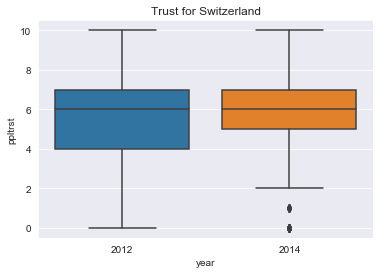

Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)


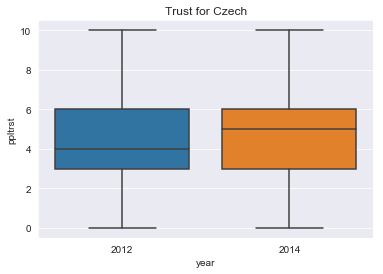

Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)


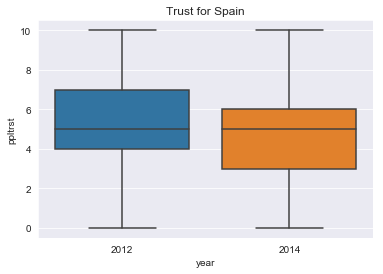

Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320272)


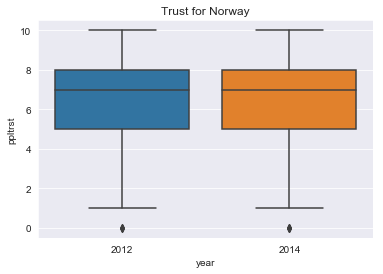

Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)


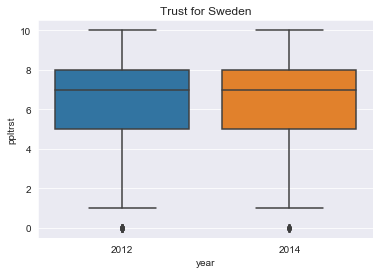

Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


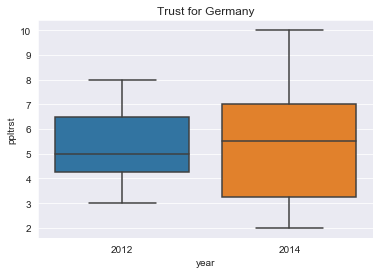

Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)


In [12]:
for x in zip(countries_name,countries):
     pair_trust(x[0], x[1])

#### Spain and Sweden show significant difference in trust between the two years.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [13]:
def pair_happier(country_name, df):
    sns.boxplot(y="happy", x="year", data=df)
    plt.title('Happiness for '+ country_name)
    plt.show()
    result=stats.ttest_rel(df.query('year == 2012').happy,
              df.query('year == 2014').happy,  nan_policy='omit')
    print(result)

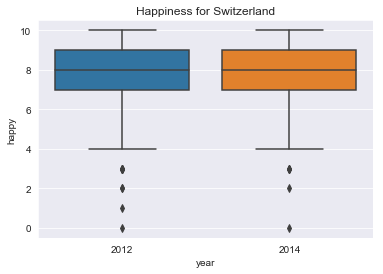

Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355429063)


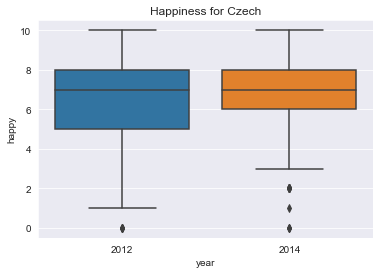

Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.1458454843389451)


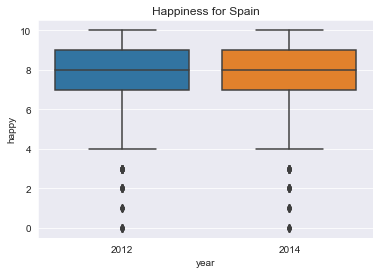

Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494)


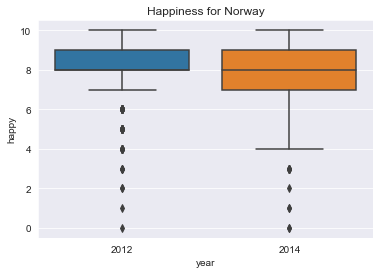

Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05)


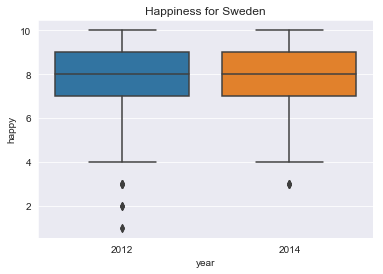

Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591233714)


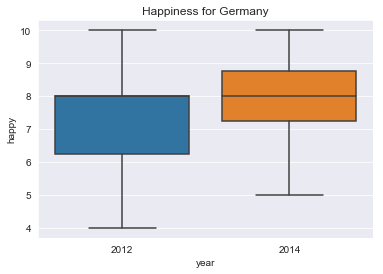

Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)


In [14]:
for x in zip(countries_name,countries):
     pair_happier(x[0], x[1])

#### Norway shows significant difference in happiness between the two years.

### 3. Who reported watching more TV in 2012, men or women?

#### t-test for independant samples

In [15]:
scipy.stats.ttest_ind(df.query('gndr == 1.0').tvtot,
              df.query('gndr == 2.0').tvtot,  nan_policy='omit')

Ttest_indResult(statistic=-1.5367741164465796, pvalue=0.12438553359970589)

#### There is no significant difference between the amount of time men and women watching tv.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

#### t-test for independent sampes

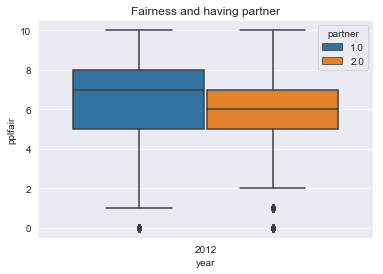

In [16]:
partner= df.query('year == 2012').query('partner == 1.0')
no_partner= df.query('year == 2012').query('partner == 2.0')

sns.boxplot(x="year", y="pplfair", hue="partner", data=df.query('year == 2012'))
plt.title('Fairness and having partner')
plt.show()

In [17]:
print(len(partner.pplfair))
print(len(no_partner.pplfair))
scipy.stats.ttest_ind(partner.pplfair, no_partner.pplfair, nan_policy='omit')

2674
1616


Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)

#### People living with a partner think people are more fair.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

#### Kruskal-Wallis tets

In [18]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

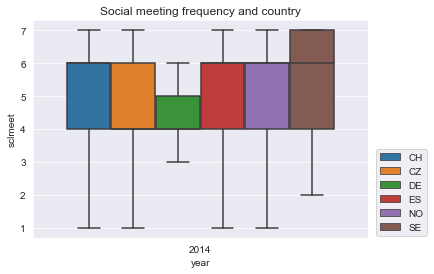

In [19]:
sns.boxplot(x="year", y="sclmeet", hue="cntry", data=df.query('year == 2014'))
plt.title('Social meeting frequency and country')
plt.legend(bbox_to_anchor=(1.05,0.45),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [20]:
ch= df.query('year == 2014').query('cntry == "CH"')
de= df.query('year == 2014').query('cntry == "DE"')
se= df.query('year == 2014').query('cntry == "SE"')

In [21]:
stats.kruskal(ch.sclmeet, de.sclmeet, se.sclmeet, nan_policy='omit')

KruskalResult(statistic=60.750460505323495, pvalue=6.429913266349467e-14)

#### There is a significant difference between Switzerland, Germany and Sweden in terms of the frequency of meeting socially.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [22]:
data= df[['year','cntry','agea','sclact']]

In [23]:
data_2014= data[data['year']==2014]

In [24]:
data_2014.head()

,year,cntry,agea,sclact
773,2014,CH,69.0,4.0
774,2014,CH,30.0,3.0
775,2014,CH,49.0,5.0
776,2014,CH,51.0,2.0
777,2014,CH,32.0,2.0


In [25]:
data_2014.agea.describe()

count    4184.000000
mean       47.416826
std        18.597779
min        15.000000
25%        33.000000
50%        47.000000
75%        62.000000
max       114.000000
Name: agea, dtype: float64

In [45]:
age_group = np.where(data_2014.agea > 62, "over_62", 
         (np.where(data_2014.agea  < 33, "under_33", "middle_age")))
data_2014['age_group']=age_group

In [46]:
data=data_2014.drop(['year', 'agea'], axis=1)

In [47]:
data.head()

,cntry,sclact,age_group
773,CH,4.0,over_62
774,CH,3.0,under_33
775,CH,5.0,middle_age
776,CH,2.0,middle_age
777,CH,2.0,under_33


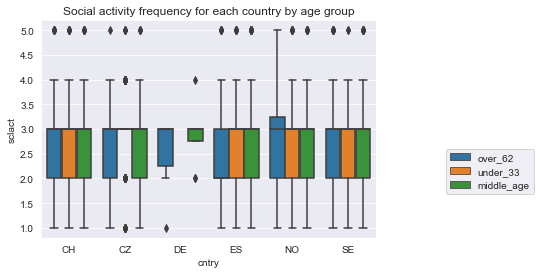

In [48]:
sns.boxplot(x="cntry", y="sclact", hue="age_group", data=data)
plt.title('Social activity frequency for each country by age group')
plt.legend(bbox_to_anchor=(1.05,0.45),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [49]:
ch_under33= data.query('cntry == "CH"').query('age_group == "under_33"')
ch_mid= data.query('cntry == "CH"').query('age_group == "middle_age"')
ch_over62= data.query('cntry == "CH"').query('age_group == "over_62"')

es_under33= data.query('cntry == "ES"').query('age_group == "under_33"')
es_mid= data.query('cntry == "ES"').query('age_group == "middle_age"')
es_over62= data.query('cntry == "ES"').query('age_group == "over_62"')

se_under33= data.query('cntry == "SE"').query('age_group == "under_33"')
se_mid= data.query('cntry == "SE"').query('age_group == "middle_age"')
se_over62= data.query('cntry == "SE"').query('age_group == "over_62"')

### Comparing each country by age group

#### Under 33 year olds

In [50]:
stats.kruskal(ch_under33.sclact, es_under33.sclact, se_under33.sclact, nan_policy='omit')

KruskalResult(statistic=5.852146788644665, pvalue=0.05360711944163086)

#### Between 33 and 62 year olds

In [51]:
stats.kruskal(ch_mid.sclact, es_mid.sclact, se_mid.sclact, nan_policy='omit')

KruskalResult(statistic=6.59893850823969, pvalue=0.0369027481861361)

#### Over 62 year olds

In [52]:
stats.kruskal(ch_over62.sclact, es_over62.sclact, se_over62.sclact, nan_policy='omit')

KruskalResult(statistic=38.63333686675696, pvalue=4.082042204752065e-09)

#### The frequency od social activity is not siginificantly different for under 33 years olds between the three countries. However, for the two age groups namely between 33 and 62 year old and over 62 year olds, the difference is significant. 